# Module 7 Unit 2
## Hierarchical clustering in Python


In [1]:
# Import libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

## Simple example 

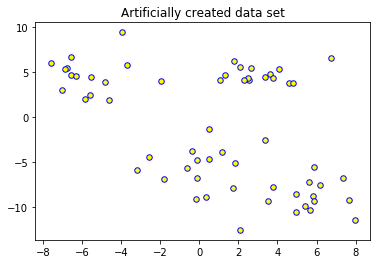

In [2]:
# Scikit-learn has a make_blobs function to make data sets
from sklearn.datasets import make_blobs

# Create data set
X, y = make_blobs(n_samples=60, n_features=2, 
                  centers=4, cluster_std=1.7,
                  random_state=10, shuffle=True)

# Plot
plt.title('Artificially created data set')
plt.scatter(X[:, 0], X[:, 1], c='yellow', marker='o', edgecolor='blue', s=30)
plt.show()

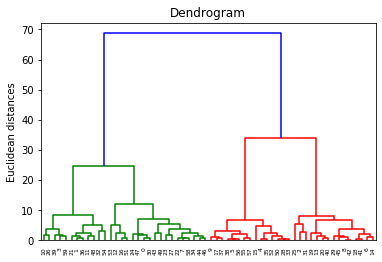

In [3]:
# Find the optimal number of clusters using a dendrogram
dendro = dendrogram(linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

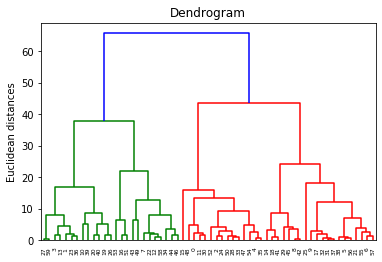

In [4]:
# The same example, but more dispersed from the centroid
X, y = make_blobs(n_samples=60, n_features=2, 
                  centers=4, cluster_std=5,
                  random_state=10, shuffle=True)

# Find the optimal number of clusters using a dendrogram
dendro = dendrogram(linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

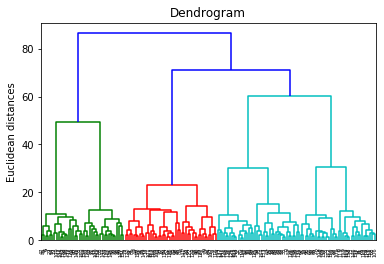

In [5]:
# Create a more typical four-dimensional data set with 8 clusters
X, y = make_blobs(n_samples=160, n_features=4, 
                  centers=8, cluster_std=2,
                  random_state=10, shuffle=True)

# Find the optimal number of clusters using a dendrogram
dendro = dendrogram(linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

## Real-world example: Household power consumption

In [6]:
 # Import data (import on first 3,000 rows)
df = pd.read_csv("household_power_consumption.txt",delimiter=";",nrows=2*60*24)

# Remove '?' entries
df = df.replace('?',np.nan)

We are only using a subset of the data to make computation times manageable. 
Note, however, that the data set is not randomised, and rows are listed in time order, i.e. every minute. 
We have selected 2 days' worth, i.e. 2 days x 60*24 = 2,880 minutes. 
The entire data set covers 4 years of data.

In [7]:
# Explore the size of the data set
df.shape

(2880, 9)

In [8]:
# Explore the type of data and feature names
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Sub_metering_1: Kitchen containing mainly a dishwasher, an oven, and a microwave (hot plates are not electric but gas-powered).

Sub_metering_2: Laundry room containing a washing machine, a tumble dryer, a refrigerator, and a light.

Sub_metering_3: Electric water heater and air conditioner.

In [9]:
# Remove the Date and Time features
# Time of day could be a useful feature but would require re-coding into a continuous variable, e.g. 0–1

X = df.iloc[:,2:]

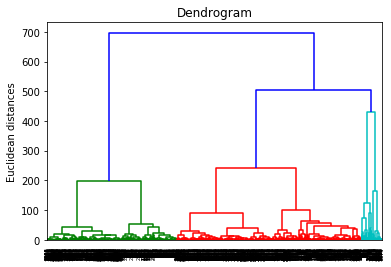

In [10]:
# Find the optimal number of clusters using a dendrogram
# Note that it may take a while for this graph to be generated

dendro = dendrogram(linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

Seems as though furthest distances between clusters occurs when there are three clusters, so use this as the number of clusters.

Actually, there is a natural cut-off with **four** clusters (light blue); however, the last two clusters (light blue) are very small.

In [11]:
# Fit with three clusters
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(X)

In [12]:
# Set up a dataframe with cluster levels
Xnew = X.copy()
Xnew["CLUSTERS"] = y_hc
Xnew.sample(10, random_state=0)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,CLUSTERS
569,2.332,0.000,244.32,9.6,0.0,0.0,0.0,1
1768,0.850,0.216,245.80,3.6,0.0,0.0,0.0,1
2543,1.728,0.076,241.18,7.0,0.0,0.0,18.0,2
2768,2.054,0.218,240.69,8.6,0.0,2.0,18.0,2
1802,0.378,0.154,245.36,1.6,0.0,2.0,0.0,1
1942,0.374,0.210,242.44,1.8,0.0,0.0,0.0,1
1129,1.560,0.130,238.77,6.4,0.0,1.0,18.0,2
619,2.426,0.066,243.81,9.8,0.0,0.0,0.0,1
2043,0.372,0.264,246.12,1.8,0.0,1.0,0.0,1
692,3.422,0.054,243.58,14.0,0.0,0.0,18.0,2


In [13]:
Xnew.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
CLUSTERS                 0
dtype: int64

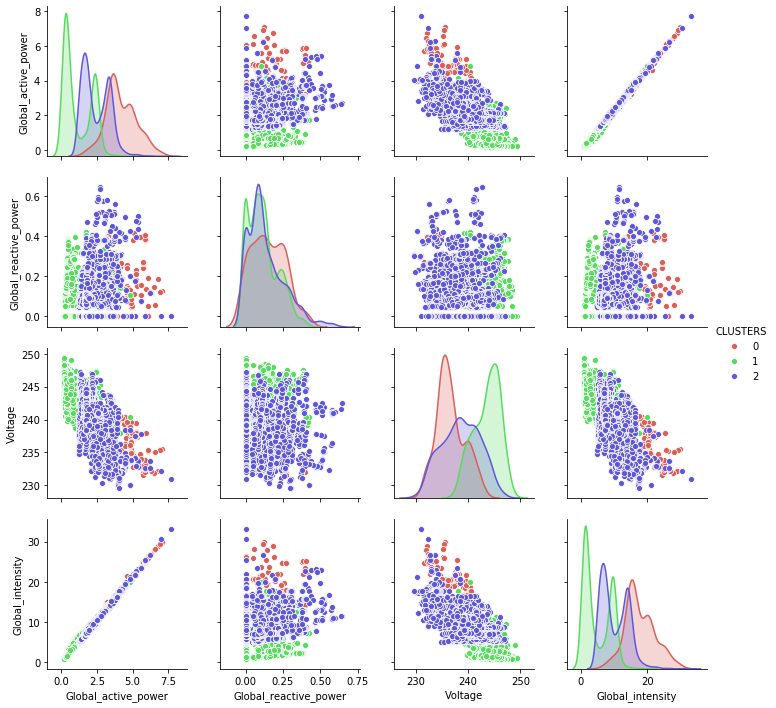

In [14]:
# Plot Global_active_power, Global_reactive_power, Voltage, and Global_intensity
var = ["Global_active_power", "Global_reactive_power","Voltage","Global_intensity"]

# Plot
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 3))

In [ ]:
# Plot Voltage and the three sub-metering stations (kitchen, laundry, and electric water heater and air conditioner)
var = ["Voltage", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 3))

As in Module 6, the distributions seem non-separable. 
Let's scale the data again using a square root transform.

In [15]:
X = np.sqrt(df.iloc[:,2:])

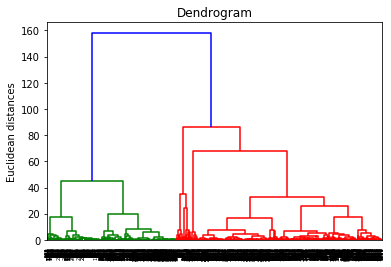

In [16]:
# Find the optimal number of clusters using a dendrogram
dendro = dendrogram(linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

**Note:** It may take a while for this graph to be generated.

After scaling, the most natural number of clusters seems to only be two.

In [17]:
# Fit with two clusters
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(X)

In [18]:
# Set up a dataframe with cluster levels
Xnew = X.copy()
Xnew["CLUSTERS"] = y_hc
Xnew.sample(6, random_state=0)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,CLUSTERS
569,1.527089,0.000000,15.630739,3.098387,0.0,0.000000,0.000000,1
1768,0.921954,0.464758,15.678010,1.897367,0.0,0.000000,0.000000,1
2543,1.314534,0.275681,15.529971,2.645751,0.0,0.000000,4.242641,0
2768,1.433178,0.466905,15.514187,2.932576,0.0,1.414214,4.242641,0
1802,0.614817,0.392428,15.663971,1.264911,0.0,1.414214,0.000000,1
1942,0.611555,0.458258,15.570485,1.341641,0.0,0.000000,0.000000,1


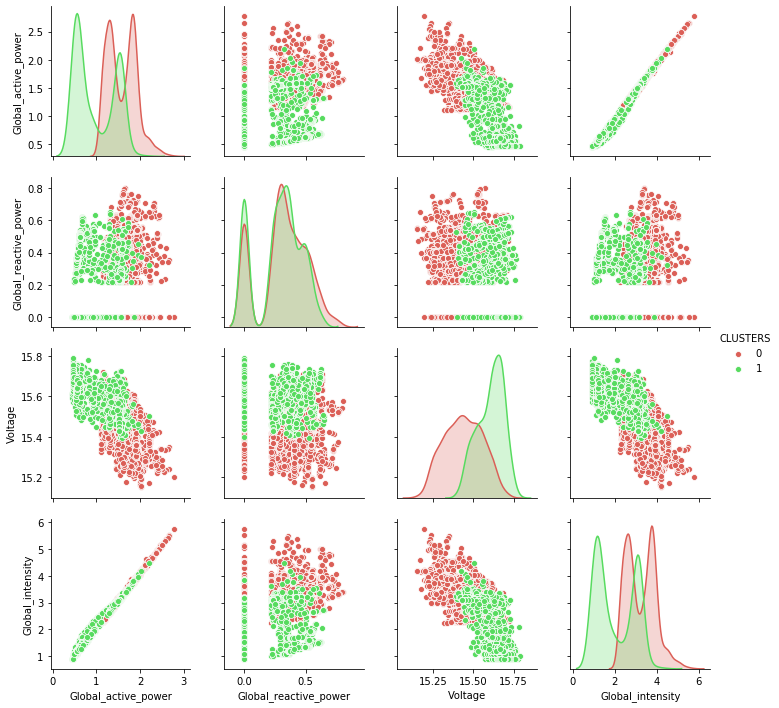

In [19]:
# Plot Global_active_power, Global_reactive_power, Voltage, and Global_intensity
var = ["Global_active_power", "Global_reactive_power","Voltage","Global_intensity"]

# Plot
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 3))

## Practice

Plot the voltage and the sub-metering stations (1, 2, and 3). What insight can you gain from these plots? 

Sub-metering station information:
* `sub_metering_1`: The kitchen, containing mainly a dishwasher, an oven, and a microwave (hot plates are not electric but gas-powered).

* `sub_metering_2`: The laundry room, containing a washing machine, a tumble dryer, a refrigerator, and a light.

* `sub_metering_3`: An electric water heater and an air conditioner.

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


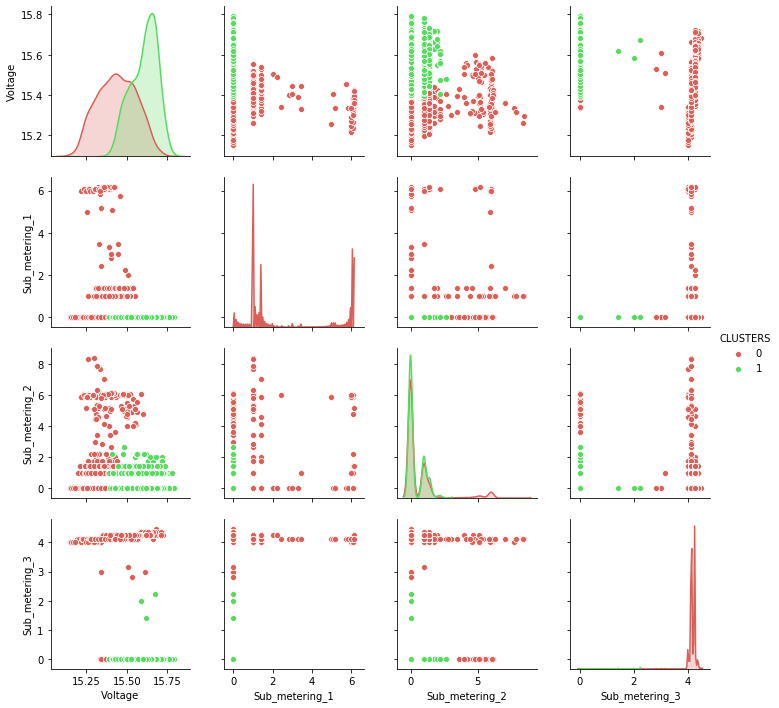

In [20]:
# Plot voltage and the sub_metering stations
# YOUR CODE HERE
# Plot Global_active_power, Global_reactive_power, Voltage, and Global_intensity
var = ["Voltage","Sub_metering_1","Sub_metering_2","Sub_metering_3"]

# Plot
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 3))

Volatge is high for cluster 1 even though the distributions are the same. There is high energy consumption for all submeters peaking at voltage 15.8.However, there is more voltage usage for cluster 1 as compared to cluster 0. More energy consumption appears to be in the 